In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Approximation de l'intégrale d'une courbe par la méthode des rectangles

[Fichier Geogebra : somme des rectangles pour la parabole $y=x^2$sur [0;1]](https://www.geogebra.org/m/n6javdkf)

au départ x est en a 

on avance avec u npas de (b-a)/n  si on a n rectangles

on construit une suite d'abscisses   x(k) = a + k * (b-a)/n

  x(n) = b
    
le rectangle d'indice k a pour base l'intervalle [x(k) ; x(k+1)]

sa hauteur est f( x(k+1) )

### Exemple de la fonction sommeRectangle(a, b, n) du cours

Que représentent les variables `u` et `v` dans la fonction ci-dessous ?

In [3]:

def f(x):
    return x ** 2

def sommeRectangle(a, b, n):
    h = (b - a) / n
    x = a 
    u = 0
    v = 0
    for k in range(0, n): #n subdivisions => n tours
        u = u + h * f(x)  #on ajoute à u l'aire du kieme rectangle à gauche
        x = x + h        #on avance x d'un pas
        v = v + h * f(x)  ##on ajoute à u l'aire du kieme rectangle à droite
    return (u, v)

In [4]:
sommeRectangle(0, 1, 1000)

(0.33283350000000095, 0.33383350000000095)

## Exemple 3

Compléter les fonctions Python ci-dessous pour qu'elles retournent une approximation de $\int_{a}^{b}f(x) \mathrm{dx}$ par la somme de rectangles à gauche construits sur $n$ subdivisions régulières de l'intervalle $[a;b]$.

In [5]:
def  rectangleGauche(f, a, b, n):
    s = 0
    pas = (b - a)/n
    x = a
    for k in range(0, n):
        s = s + pas * f(x)   #x * f(x) est l'aire du kieme rectangle
        x = x + pas
    return s


def rectangleGauche2(f, a, b, n):
    s = 0
    pas = (b - a) / n
    for k in range(0, n):
        s = s + pas * f(a + k * pas)   # ou  s = s + pas * f(a + k * (b-a)/n)
    return s

def rectangleGaucheDessin(f, a, b, n):
    s = 0
    pas = (b - a)/n
    x = a
    for k in range(n):
        s = s + f(x) * pas
        plt.fill([x, x + pas, x + pas, x, x], [0] * 2 + [f(x)] * 2 + [0], hatch='/',edgecolor='black', facecolor='none')
        x = x + pas        
    lesx = np.linspace(a, b, 1000)  
    fvect = np.vectorize(f)
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',a))
    plt.plot(lesx, fvect(lesx), color='black')
    plt.title(r"Rectangles à gauche $\int_{%d}^{%d}f(x)dx\approx$%1.3f"%(a,b,s))
    plt.savefig('methodeRectangleGauche-{}-{}-{}-{}subdivisions.eps'.format(f.__name__,a,b,n))
    plt.show()
    return s

Écrire une fonction `rectangleDroite(f, a, b, n)` qui retourne une approximation de $\int_{a}^{b}f(x) \mathrm{dx}$ par la somme de rectangles à droite construits sur $n$ subdivisions régulières de l'intervalle $[a;b]$.

* premier tour :   x = a + pas
* deuxième tour : x = a + 2 * pas
* troisième tour : x = a + 3 * pas

In [6]:
def rectangleDroite(f, a, b, n):
    s = 0
    pas = (b - a)/n
    x = a + pas  #borne droite
    for k in range(0, n):
        s = s + pas * f(x)
        x = x + pas
    return s

def rectangleDroite2(f, a, b, n):
    s = 0
    pas = (b - a) / n
    for k in range(1, n + 1):
        s = s + pas * f(a +  k * pas) 
    return s

def rectangleDroite3(f, a, b, n):
    s = 0
    pas = (b - a) / n
    for k in range(0, n):
        s = s + pas * f(a + (k+1) * pas)
    return s


def rectangleDroiteDessin(f, a, b, n):
    s = 0
    pas = (b - a)/n
    x = a
    for k in range(n):
        s = s + f(x + pas) * pas
        plt.fill([x, x + pas, x + pas, x, x], [0] * 2 + [f(x+pas)] * 2 + [0], hatch='/',edgecolor='black', facecolor='none')
        x = x + pas        
    lesx = np.linspace(a, b, 1000)  
    fvect = np.vectorize(f)
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',a))
    plt.plot(lesx, fvect(lesx), color='black')
    plt.title(r"Rectangles à droite $\int_{%d}^{%d}f(x)dx\approx$%1.3f"%(a,b,s))
    plt.savefig('methodeRectangleDroite-{}-{}-{}-{}subdivisions.eps'.format(f.__name__,a,b,n))
    plt.show()
    return s

In [7]:
def inverse(x):
    return 1 / x

In [8]:
inverse.__name__

'inverse'

In [9]:
rectangleGauche(inverse, 1, 2, 10)

0.7187714031754279

In [10]:
rectangleGauche2(inverse, 1, 2, 10)

0.718771403175428

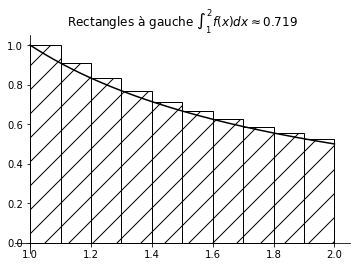

0.7187714031754279

In [11]:
rectangleGaucheDessin(inverse,1,2,10)

In [12]:
def carre(x):
    return x ** 2

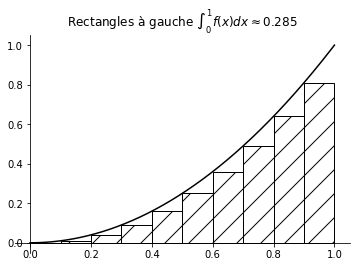

0.2849999999999999

In [13]:
rectangleGaucheDessin(carre,0,1,10)

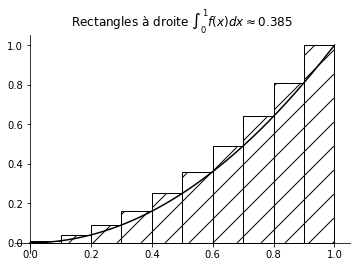

0.3849999999999999

In [14]:
rectangleDroiteDessin(carre, 0, 1, 10)